In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import datetime as dt

In [4]:
df = pd.read_csv('BrentOilPrices.csv')
df

Date  Price
0        20-May-87  18.63
1        21-May-87  18.45
2        22-May-87  18.55
3        25-May-87  18.60
4        26-May-87  18.63
...            ...    ...
8549  Jan 19, 2021  55.38
8550  Jan 20, 2021  55.66
8551  Jan 21, 2021  55.68
8552  Jan 22, 2021  55.22
8553  Jan 25, 2021  55.44

[8554 rows x 2 columns]

In [5]:
x1 = [dt.datetime.strptime(d,'%d-%b-%y').date() for d in df['Date'][:8360]]
x2 = [dt.datetime.strptime(d,'%b %d, %Y').date() for d in df['Date'][8360:]]

times = x1 + x2

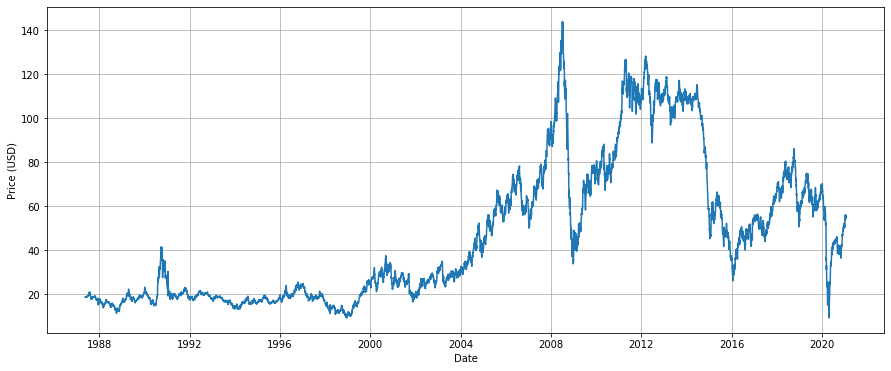

In [6]:
plt.figure(figsize = (15, 6))
plt.plot(times, df['Price'])
plt.grid()
plt.ylabel('Price (USD)')
plt.xlabel('Date')
plt.show()

In [7]:
df['Date'][5500:6250]

5500     5-Jan-09
5501     6-Jan-09
5502     7-Jan-09
5503     8-Jan-09
5504     9-Jan-09
          ...    
6245    21-Dec-11
6246    22-Dec-11
6247    23-Dec-11
6248    28-Dec-11
6249    29-Dec-11
Name: Date, Length: 750, dtype: object

In [8]:
years = ['87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '00', '01', '02', '03', '04', '05', 
         '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20']
print(len(years))

34


In [9]:
yearlyPrices = {}
for i in years:
    yearlyPrices[i] = []
yearlyDates = {}
for i in years:
    yearlyDates[i] = []
    
# print(yearlyData) 

for i in range(len(df['Date'][:8360])):
    for j in years:
        if df['Date'][i][-2:] == j:
            yearlyPrices[j].append(df['Price'][i])
            yearlyDates[j].append(df['Date'][i])  

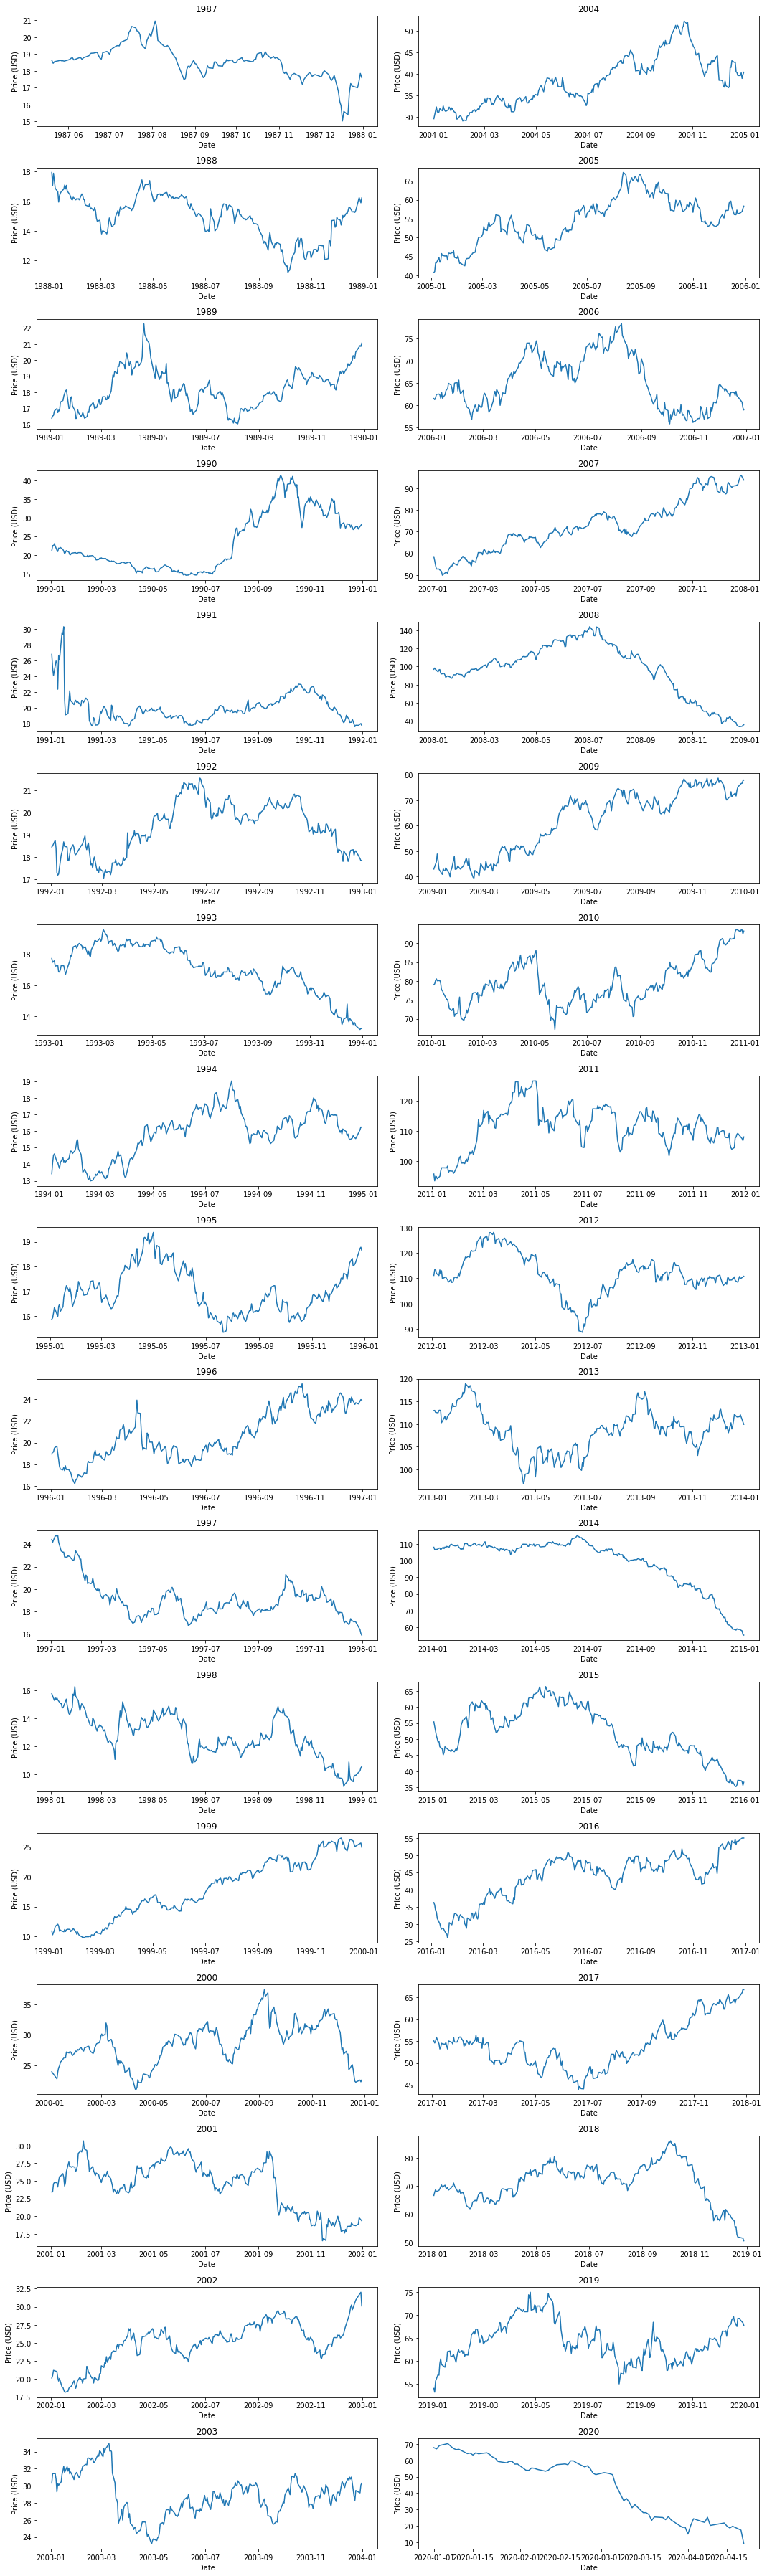

In [32]:
test = np.linspace(0, 10, 100)
fig, ax = plt.subplots(17, 2, figsize = (15, 50))
for i in range(0, 34, 1):
        if i <= 16:
            ax[i,0].plot([dt.datetime.strptime(d,'%d-%b-%y').date() for d in yearlyDates[years[i]]], yearlyPrices[years[i]])
            if years[i][0] == '0' or years[i][0] == '1' or years[i][0] == '2':
                ax[i,0].set_title('20'+years[i])
            else:
                ax[i,0].set_title('19'+years[i])
            ax[i,0].set_ylabel('Price (USD)')
            ax[i,0].set_xlabel('Date')
        elif i > 16:
            ii = i
            ii = ii - 17
            ax[ii,1].plot([dt.datetime.strptime(d,'%d-%b-%y').date() for d in yearlyDates[years[i]]], yearlyPrices[years[i]])
            if years[i][0] == '0' or years[i][0] == '1' or years[i][0] == '2':
                ax[ii,1].set_title('20'+years[i])
            else:
                ax[ii,1].set_title('19'+years[i])
            ax[ii,1].set_ylabel('Price (USD)')
            ax[ii,1].set_xlabel('Date')
        
plt.tight_layout()
plt.show()